In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('student_admission_dataset.csv')
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


In [6]:
df.isna().sum()

GPA                           0
SAT_Score                     0
Extracurricular_Activities    0
Admission_Status              0
dtype: int64

In [8]:
df.dtypes

GPA                           float64
SAT_Score                       int64
Extracurricular_Activities      int64
Admission_Status               object
dtype: object

In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Admission_Status']= df['Admission_Status'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   GPA                         250 non-null    float64 
 1   SAT_Score                   250 non-null    int64   
 2   Extracurricular_Activities  250 non-null    int64   
 3   Admission_Status            250 non-null    category
dtypes: category(1), float64(1), int64(2)
memory usage: 6.4 KB


In [13]:
df.describe()

,GPA,SAT_Score,Extracurricular_Activities
count,250.000000,250.000000,250.000000
mean,3.238320,1250.432000,5.204000
std,0.438607,204.733163,2.964716
min,2.500000,900.000000,0.000000
25%,2.850000,1080.250000,3.000000
50%,3.230000,1237.000000,5.000000
75%,3.590000,1426.000000,7.750000
max,4.000000,1598.000000,10.000000


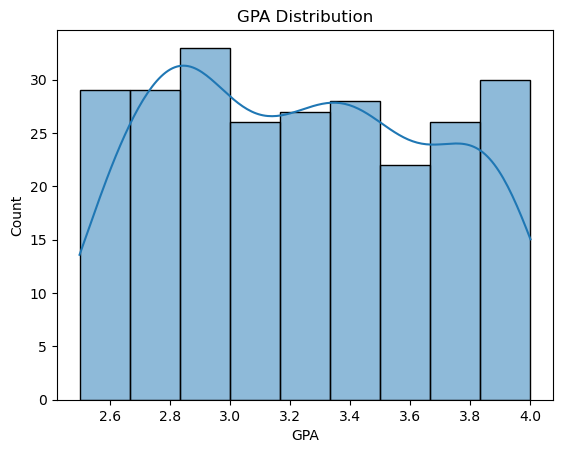

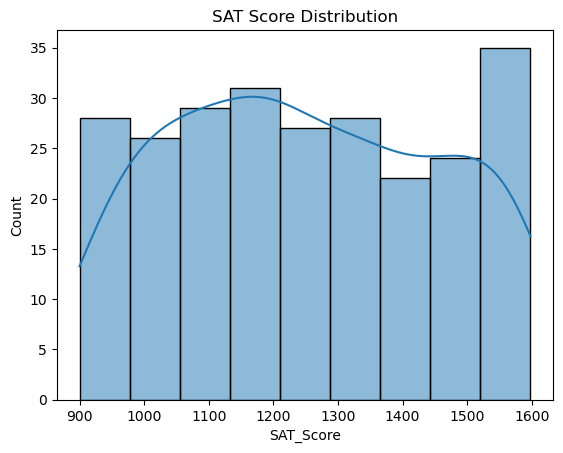

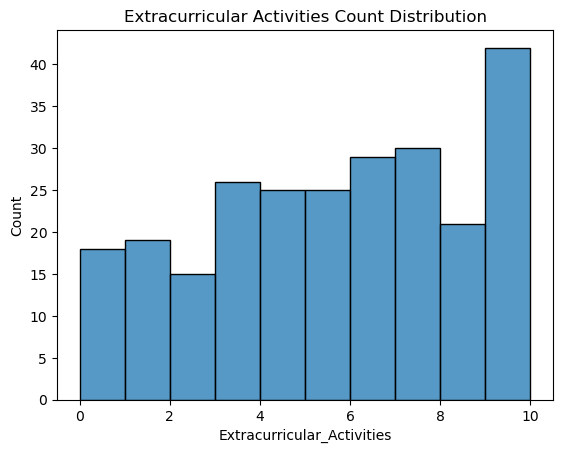

In [15]:
# GPA distribution
sns.histplot(df['GPA'], kde=True)
plt.title('GPA Distribution')
plt.show()

# SAT Score distribution
sns.histplot(df['SAT_Score'], kde=True)
plt.title('SAT Score Distribution')
plt.show()

# Extracurricular Activities distribution
sns.histplot(df['Extracurricular_Activities'], bins=10, kde=False)
plt.title('Extracurricular Activities Count Distribution')
plt.show()

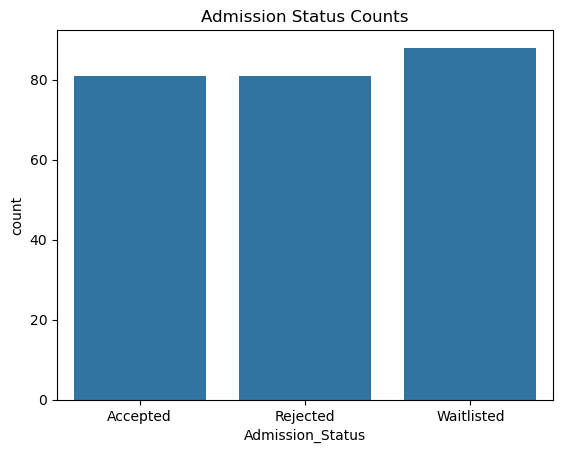

In [19]:
sns.countplot(data=df, x='Admission_Status')
plt.title('Admission Status Counts')
plt.show()

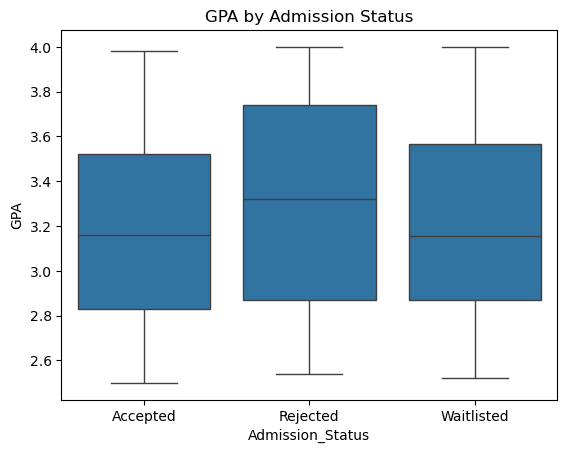

In [20]:
sns.boxplot(data=df, x='Admission_Status', y='GPA')
plt.title('GPA by Admission Status')
plt.show()

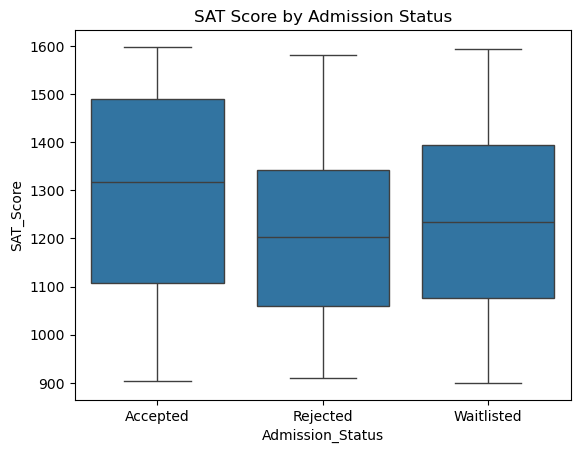

In [21]:
sns.boxplot(data=df, x='Admission_Status', y='SAT_Score')
plt.title('SAT Score by Admission Status')
plt.show()

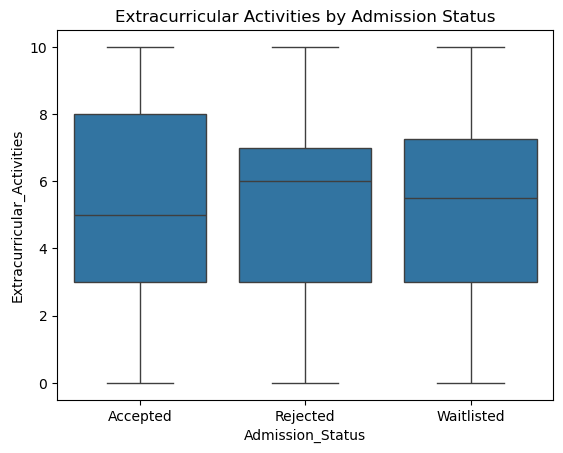

In [22]:
sns.boxplot(data=df, x='Admission_Status', y='Extracurricular_Activities')
plt.title('Extracurricular Activities by Admission Status')
plt.show()

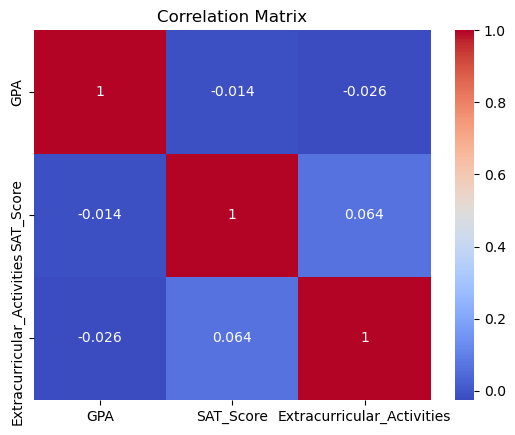

In [23]:
corr = df[['GPA', 'SAT_Score', 'Extracurricular_Activities']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
df['Admission_Status'].unique()

['Rejected', 'Accepted', 'Waitlisted']
Categories (3, object): ['Accepted', 'Rejected', 'Waitlisted']

In [26]:
df['Admission_Status_cat'] = df['Admission_Status'].cat.codes

# Mapping
label_mapping = dict(enumerate(df['Admission_Status'].cat.categories))
print("Label mapping:", label_mapping)

Label mapping: {0: 'Accepted', 1: 'Rejected', 2: 'Waitlisted'}


In [27]:
from sklearn.preprocessing import StandardScaler
#Define features and labels
X = df[['GPA', 'SAT_Score', 'Extracurricular_Activities']]
y = df['Admission_Status_cat']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
#Train Multinomial Logistic Regression with Hyperparameter Tuning

model = LogisticRegression(multi_class='multinomial', max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg']  # Solvers that support multinomial
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'solver': 'lbfgs'}


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in ve

In [30]:
#Model Evaluation
y_pred = best_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.42
